In [3]:
import os
os.chdir('/home/kerninator/PycharmProjects/grib_windfields/')
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.spatial import Delaunay
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from Utils.PlotGenerator import PlotGenerator

In [4]:
# http://mathworld.wolfram.com/StereographicProjection.html
def projectStereo(lon, lat, lon0=-120,lat0=90,R=1): # lon0=240,lat0=90,
    phi = np.radians(lon)
    theta = np.radians(lat)
    
    phi0 = np.radians(lon0)
    theta0 = np.radians(lat0)
    
    k = (2 * R) / (1 + np.sin(theta0) * np.sin(theta) + np.cos(theta0) * np.cos(theta) * np.cos(phi - phi0))
    
    x = k * np.cos(theta) * np.sin(phi - phi0)
    y = k * (np.cos(theta0) * np.sin(theta) - np.sin(theta0) * np.cos(theta) * np.cos(phi - phi0))
    
    return [np.degrees(x) + lon0, np.degrees(y) + 90]

In [7]:
data = np.load('data/raw/ERA5_predictand_vars_area2_2018_packed_raw.npz')
#data = np.load('data/raw/HRES_100m_wind_cpts_area2_2018_packed_raw.npz')
winds = data['winds']
windU = winds[:, :winds.shape[1] // 2]
windV = winds[:, winds.shape[1] // 2:]
lons = data['lons']
lats = data['lats']
seaMask = data['seaMask']
z = data['z']
print(data.files)

['winds', 'z', 'seaMask', 'lons', 'lats', 'valid_times']


In [14]:
len(z.shape)
#pg = PlotGenerator(z, np.array([lons, lats]))

1

In [9]:
# convert lat, lon to 2D points
points = np.vstack((lons, lats)).T

pointsSphere = []
# map spherical coordinates to unit sphere
for point in points:
    
    pointsSphere += [projectStereo(point[0], point[1])]
    
#     phi = np.radians(point[0])
#     theta = np.radians(90 + point[1])
    
#     x = np.cos(theta) * np.cos(phi)
#     y = np.cos(theta) * np.sin(phi)
#     z = np.sin(theta)#np.outer(np.ones(np.size(u)), np.cos(v))  #np.sin(theta)
    
#     pointsSphere += [[x, y, z]]
    
pointsSphere = np.array(pointsSphere)
# print(pointsSphere3D)
#print(pointsSphere3D[:,0])

print(pointsSphere.shape)
print(pointsSphere[:,1])

(1748, 2)
[54.33851032 54.28908006 54.24204001 ... 43.24045425 43.28992747
 43.3414016 ]


In [10]:
# Triangulate points
from matplotlib.tri import Triangulation, TriAnalyzer, UniformTriRefiner

tri = Triangulation(pointsSphere[:, 0], pointsSphere[:, 1])
min_circle_ratio = 0.05
tri.set_mask(TriAnalyzer(tri).get_flat_tri_mask(min_circle_ratio))

# refiner = UniformTriRefiner(tri)
# tri_refi, z_test_refi = refiner.refine_field(z_test, subdiv=subdiv)

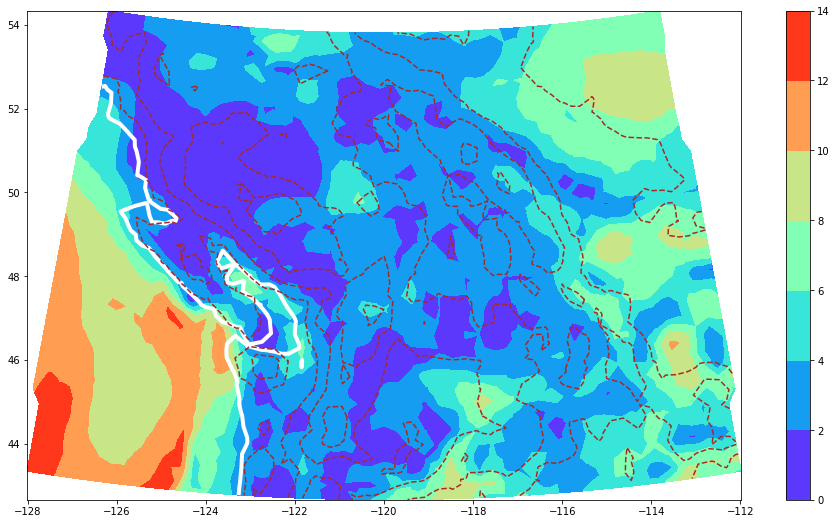

In [6]:
#tri = Delaunay(pointsSphere[:,:3])
fig = plt.figure(figsize=(16, 9))
#ax = fig.gca(projection='3d')

hrs = 200
data = np.sqrt(windU[hrs] ** 2 + windV[hrs] ** 2)

# scatter plot of points on grid
# plt.plot(pointsSphere[:,0], pointsSphere[:,1], 'o')

# default triangle mesh
#plt.triplot(tri)

# color bar for data on grid
plt.tricontourf(tri, data, cmap=plt.cm.rainbow, 
                       levels=np.arange(np.floor(np.min(data)), np.ceil(np.max(data) + 0.5), 2))
# draw color bar
plt.colorbar()

# sea mask
plt.tricontour(tri, seaMask, colors='white', levels=[0.5], linewidths=4)
# height field
plt.tricontour(tri, z, colors='brown',levels=np.arange(250,4000,500), linestyles='dashed')



#plt.quiver(tri.x, tri.y, windU[hrs], windV[hrs])

plt.show()